In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
path=r"C:\Users\ainap\Downloads"
pathf=path.replace('\\',"/")
print(pathf) 
file="Bengaluru_House_Data.csv"
df=pd.read_csv(pathf+'/'+file,header=0)

C:/Users/ainap/Downloads


# Data cleaning

####  In python, a list forms a pandas Series which indexed. A collection of pandas Series is called a dataframe. 'df' here is a dataframe. It is like a table for our data. Series is like one column

In [3]:
df.shape #rows,columns
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby("area_type")['area_type'].agg('count')  # To find out what is the count of each area type 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df=df.drop(["area_type","society",'balcony','availability'],axis='columns')

In [6]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.isnull().sum()#tells us the number of rows where the value is NA

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df['size'].unique() #tells us what all distinct values are present under the size column 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:

df["BHK"]=df['size'].apply(lambda x : int(x.split(" ")[0]))
#Using a loop to iterate over a DataFrame is to use the pandas .apply() method. 
#This function acts as a map() function in Python. It takes a function as an input and applies this 
#function to an entire DataFrame.

In [12]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
#We dont want ranges in the total sqft column hence we make a function to rectify it 
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(isfloat)]
#Now we have pinpointed all the variables which are float

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [15]:
def floatToNum(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return (float(x))
    except:
        None

In [16]:
df['total_sqft']=df['total_sqft'].apply(floatToNum)

In [17]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering 

In [18]:
df1=df.copy()
df1['pricePerSqft']=df1['price']*100000/df1['total_sqft']
df1.head()
#Price is in lacs hence the pricePerSqft is in rupees after calc

,location,size,total_sqft,bath,price,BHK,pricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Now we have location as a categorical variable. To create 1303 dummy variable is a DIMENSIONAL CURSE. We hence employ a diff technique.

In [19]:
np.set_printoptions(threshold=np.inf)

In [20]:
df1.head()
df1.location=df1.location.apply(lambda x: x.strip())
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64


In [21]:
loc_under_10=location_stats[location_stats<=10]
loc_under_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [22]:
df1.location=df1.location.apply(lambda x : 'others' if x in loc_under_10 else x)

In [23]:
len(df1.location.unique())

242

### ^Until now, we reduced in the categories in the location column 

### Taking care of outliers

In [24]:
df1[df1['total_sqft']/df.BHK<300]

,location,size,total_sqft,bath,price,BHK,pricePerSqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [25]:
df2=df1[~((df1['total_sqft']/df.BHK)<300)]

In [26]:
df2.shape

(12502, 7)

In [27]:
df2.pricePerSqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: pricePerSqft, dtype: float64

#### We have to remove the outliers according to the location. Hence, we group by location and then remove whatever is below mean- std deviation and remove what is above mean + std deviation

In [31]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'): #Group by and operations on each individual group
        mean=np.mean(subdf.pricePerSqft)
        std_dev=np.std(subdf.pricePerSqft)
        reduced_df=subdf[(subdf.pricePerSqft>(mean-std_dev)) & (subdf.pricePerSqft<=(mean+std_dev))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
df3=remove_outliers(df2)
df3.shape

(10241, 7)

### We are checking if the price of 2 bhk is greater than 3 bhk

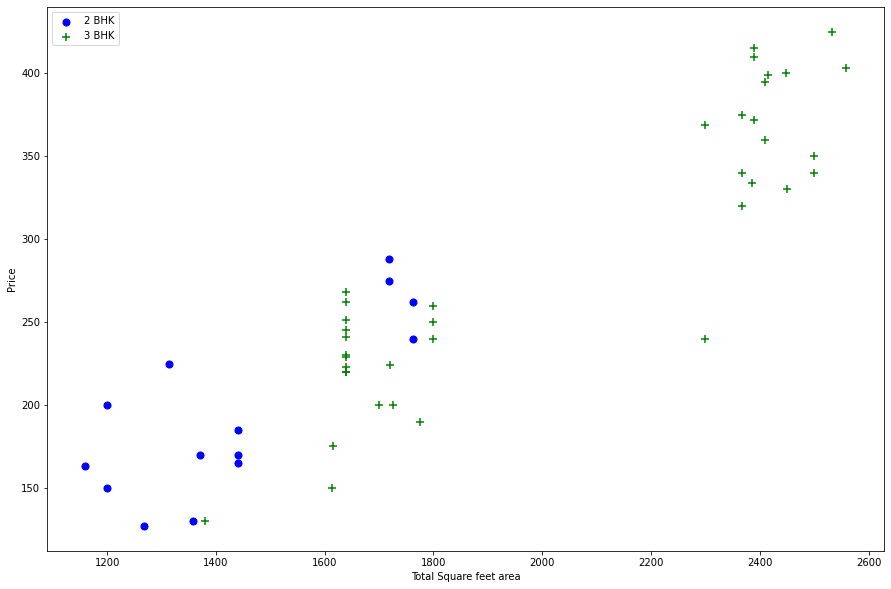

In [39]:
def scatterplot(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)] #Extracting concerned datasets
    matplotlib.rcParams['figure.figsize']=(15,10) #decides the displayed size of the scatterplot
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="green",label="3 BHK",s=50, marker='+')
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price")
    plt.legend()
    
scatterplot(df3,'Rajaji Nagar')

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.pricePerSqft),
                'std': np.std(bhk_df.pricePerSqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.pricePerSqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(7329, 7)

Text(0, 0.5, 'Count')

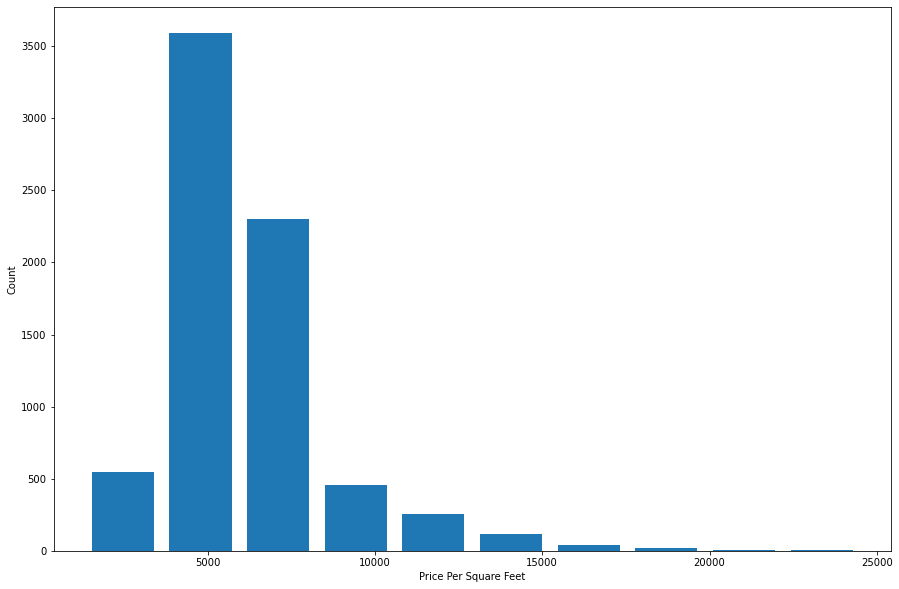

In [52]:
#For visualization of data
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df4.pricePerSqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'count')

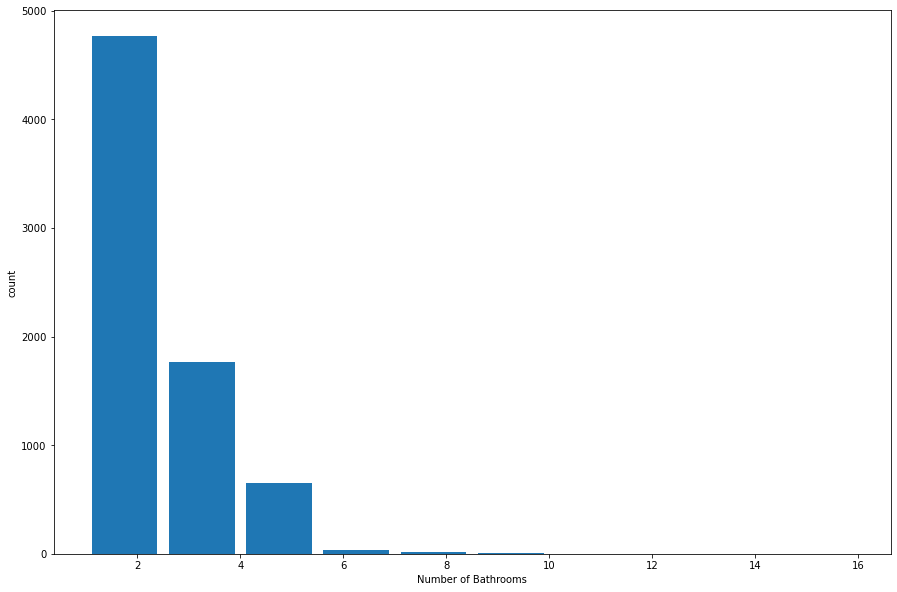

In [56]:
# To see if bathroom count exceeds 2+ room count because it is unusual.
df4[df4.bath>10]
df4=df4[df4.bath<(df4.BHK+2)]
plt.hist(df4.bath,rwidth=0.85)
plt.xlabel("Number of Bathrooms")
plt.ylabel("count")


In [67]:
df4.head()

,location,size,total_sqft,bath,price,BHK,pricePerSqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [69]:
df4.drop(['size','pricePerSqft'],axis='columns')

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,others,1200.0,2.0,70.0,2
10233,others,1800.0,1.0,200.0,1
10236,others,1353.0,2.0,110.0,2
10237,others,812.0,1.0,26.0,1


Now location variable is a categorical variable so we have to get dummy variable for it.



In [71]:
dummy=pd.get_dummies(df4.location)

In [75]:
dummy=dummy.drop(['others'],axis='columns')

In [77]:
dummy.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df5=pd.concat([df4,dummy],axis='columns')
df5.head()
df5=df5.drop('location',axis='columns')

In [88]:

df5.head()
df5.shape

(7251, 245)

# NOW the data cleaning process is completed. We now transition to testing various models with our data.

In [94]:
X = df5.drop(['price'],axis='columns')
X.head(3)
y = df5.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

## Training the model with 80 % of the data and testing the model with rest 20% of the data.

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [97]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) #DISPLAYS THE SCORE OUR OUR MODEL

0.8452277697874312

##### When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the 
##### accuracy score by default (accuracy is correct_preds / all_preds)


----------------------------------------------------------
Now we make a function to predict the prices after employing out model

In [100]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] #It gives the location's index

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [104]:
predict_price("Indira Nagar",1000,3,3)

184.5843020203347

In [108]:
import os 
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\ainap'

In [112]:
import pickle
with open('bangalore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [113]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))